### Läs in värden för csv fil, datapoints Pokemon

In [3]:
import csv
import matplotlib.pyplot as plt

# Läsa in datapunkter, gör om till dictionary

pokemon_list = []

with open("..\\data\\datapoints.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        pokemon_list.append({"width": float(row["width"]), "height": float(row["height"]), "label": int(row["label"])})
print(pokemon_list)

[{'width': 21.959384499160468, 'height': 31.23956701424158, 'label': 0}, {'width': 23.63591632187622, 'height': 36.46821490673444, 'label': 1}, {'width': 17.714056417303343, 'height': 31.44170391314962, 'label': 0}, {'width': 21.78020031891186, 'height': 33.213397759738264, 'label': 1}, {'width': 25.20630552859312, 'height': 36.558816149350534, 'label': 1}, {'width': 19.332572350434354, 'height': 32.25325633655492, 'label': 0}, {'width': 24.73645685241186, 'height': 35.33291181124776, 'label': 1}, {'width': 23.79257560586339, 'height': 38.10372825362463, 'label': 1}, {'width': 24.557612968127465, 'height': 36.73144402805611, 'label': 1}, {'width': 20.191281253428173, 'height': 35.06966921830237, 'label': 0}, {'width': 25.813562951888365, 'height': 35.561029988644336, 'label': 1}, {'width': 24.923378667802954, 'height': 34.463907946680294, 'label': 1}, {'width': 25.311244044578427, 'height': 34.117212558131975, 'label': 1}, {'width': 22.819091361866796, 'height': 34.25516433025548, 'lab

### Läsa in värden för testpoints

In [4]:
#Läsa in värden för testpoints
with open("..\\data\\testpoints.txt") as file: 
   lines = [testpoint.strip("\n") for testpoint in file.readlines()] 
print(lines) 


['Test points:', '1. (25, 32)', '2. (24.2, 31.5)', '3. (22, 34)', '4. (20.5, 34)']


In [5]:
# Få fram siffror utan parentes
sliced_testpoints = []

for item in lines[1:]:
   # ta fram index 
   start_index = item.index("(")
   stop_index = item.index(")")
   # skapa varje värde, se till att parenteser ej kommer med
   sliced_string = item[start_index+1: stop_index]
   # appenda till lista
   sliced_testpoints.append(sliced_string)
print(sliced_testpoints)

['25, 32', '24.2, 31.5', '22, 34', '20.5, 34']


### Final format for testpoints

In [6]:
# Fredrik visat hur man kan göra på detta sätt
testpoints = []

for text in sliced_testpoints:
    width, height = text.split(', ')
    testpoints.append({"width": float(width), "height": float(height)})

testpoints

[{'width': 25.0, 'height': 32.0},
 {'width': 24.2, 'height': 31.5},
 {'width': 22.0, 'height': 34.0},
 {'width': 20.5, 'height': 34.0}]

### Plot data and testpoints

Text(0, 0.5, 'Height')

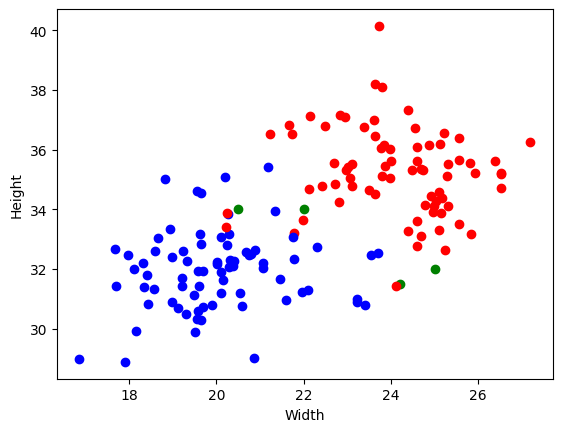

In [7]:
# plotta testpunker

for i in testpoints:
    plt.scatter(i["width"], i["height"], marker = "o", color = "green")

#Plotta datapunkter 

for i in pokemon_list:
    if i["label"] == 0:
        plt.scatter(i["width"], i["height"], marker = "o", color = "blue")
    else:
        plt.scatter(i["width"], i["height"], marker = "o", color = "red")

plt.xlabel("Width")
plt.ylabel("Height")

### Function to determine distance between datapoints and testpoints

In [8]:
import math

def list_distances(pokemon_list, testpoints):
    list_distances = []
    test_width = testpoints["width"]
    test_height = testpoints["height"]

    for i in pokemon_list:
        difference_width = (i["width"]- test_width)**2
        difference_height = (i["height"]- test_height)**2
        distance = math.sqrt(difference_width + difference_height)
        label = i["label"]
        list_distances.append({"distance": distance, "label": label})
    return list_distances

### Create the lists of distance for all testpoints

In [9]:
distance_list1 = list_distances(pokemon_list, testpoints[0])
distance_list2 = list_distances(pokemon_list, testpoints[1])
distance_list3 = list_distances(pokemon_list, testpoints[2])
distance_list4 = list_distances(pokemon_list, testpoints[3])

print(distance_list2)

[{'distance': 2.2557001491052464, 'label': 0}, {'distance': 5.000134973720603, 'label': 1}, {'distance': 6.486205561934189, 'label': 0}, {'distance': 2.964989440060515, 'label': 1}, {'distance': 5.157932885353089, 'label': 1}, {'distance': 4.925367705290264, 'label': 0}, {'distance': 3.8702711671538257, 'label': 1}, {'distance': 6.6162845679926585, 'label': 1}, {'distance': 5.243652701472216, 'label': 1}, {'distance': 5.367714999626179, 'label': 0}, {'distance': 4.369845531409012, 'label': 1}, {'distance': 3.050905933231468, 'label': 1}, {'distance': 2.8433545155422912, 'label': 1}, {'distance': 3.081856445972628, 'label': 1}, {'distance': 5.492742220139161, 'label': 0}, {'distance': 5.859632749240489, 'label': 0}, {'distance': 3.650333833995459, 'label': 1}, {'distance': 2.3275356665040023, 'label': 1}, {'distance': 4.165691237268443, 'label': 0}, {'distance': 6.8152216876346685, 'label': 0}, {'distance': 5.838609903121851, 'label': 1}, {'distance': 4.386359146164021, 'label': 1}, {'d

### Sort the lists in ascending order and answer to the first part

In [10]:
sorted_list1 = sorted(distance_list1, key=lambda x: x["distance"])
sorted_list2 = sorted(distance_list2, key=lambda x: x["distance"])
sorted_list3 = sorted(distance_list3, key=lambda x: x["distance"])
sorted_list4 = sorted(distance_list4, key=lambda x: x["distance"])
print(f"{sorted_list1[0] = }\n{sorted_list2[0] = }\n{sorted_list3[0] = }\n{sorted_list4[0] = }\n")   # Print index 0 for each list (smallest number)

sorted_list1[0] = {'distance': 0.6829635758323602, 'label': 1}
sorted_list2[0] = {'distance': 0.12078857390630211, 'label': 1}
sorted_list3[0] = {'distance': 0.3542396645807627, 'label': 1}
sorted_list4[0] = {'distance': 0.2707605811313157, 'label': 0}



### Uppgift 1 

### Input function

In [11]:
# Function för input

def input_datapoints():
    input_list = []
    while True:
        try:
            input_width = float(input("Input width: "))
            input_height = float(input("Input height: "))
            if input_width < 0 or input_height < 0:
                raise ValueError("Value must be positive")
            input_list.append({"width":float(input_width), "height":float(input_height)})
            break
        except ValueError:
            print("You have to enter a positive numeric number: ")        #Källa
    return input_list


### Answer to uppgift 1, calling function for input in the function for distance

In [12]:
# Function för classificering

def classify_by_input():
    # take input with try, except handling

    input_data = input_datapoints()

    # calculate distances of input datapoints and pokemons datapoints, OBS FÖR ENSKILD DATAPUNKT
    distance_list = list_distances(pokemon_list, input_data[0])    # I enter index for input_data because list indeces cannot be string, within the loop it has to be something other than a string (the whole list is a string)
    
    # sort and print the distance_list
    sorted_list = sorted(distance_list, key=lambda x: x["distance"])
    return sorted_list

### Answer uppgift 1

In [13]:
# Test av function för classificiering
list_distance_input = classify_by_input()
print(f"{list_distance_input[0] = }")     # print the first index = smallest distance and see label, 0 = Pichu, 1 = Pikashu

list_distance_input[0] = {'distance': 9.071542292922365, 'label': 0}


### Answer uppgift 2

### Ta reda på vilken pokemon testpoints är utifrån 10 närmsta distances

In [14]:
# Count occurences of Pichu and Pikashu in the smallest 10 distances
count_sorted_list1 = sum(1 for key in sorted_list1[0:10] if key['label'] == 0)
count_sorted_list2 = sum(1 for key in sorted_list2[0:10] if key['label'] == 0)
count_sorted_list3 = sum(1 for key in sorted_list3[0:10] if key['label'] == 0)
count_sorted_list4 = sum(1 for key in sorted_list4[0:10] if key['label'] == 0)

# print slices of already existing sorted lists and keep smallest 10 distances
#print(f"{sorted_list1[0:10] =}\n{sorted_list2[0:10] =}\n{sorted_list3[0:10] =}\n{sorted_list4[0:10] =}\n") 

print(f"{count_sorted_list1 = } Pichu, and {10 - count_sorted_list1} Pikashu") 
print(f"{count_sorted_list2 = } Pichu, and {10 - count_sorted_list2} Pikashu") 
print(f"{count_sorted_list3 = } Pichu, and {10 - count_sorted_list3} Pikashu") 
print(f"{count_sorted_list4 = } Pichu, and {10 - count_sorted_list4} Pikashu") 

count_sorted_list1 = 2 Pichu, and 8 Pikashu
count_sorted_list2 = 5 Pichu, and 5 Pikashu
count_sorted_list3 = 3 Pichu, and 7 Pikashu
count_sorted_list4 = 8 Pichu, and 2 Pikashu


## Bonusuppgift
### Uppgift 3

In [15]:
# Dela in ursprungsdatan slumpmässigt så att 100 är träningsdata (50 Pikashu, 50 Pichu), 50 testdata (25 Pikashu, 25 Pichu)
import random
random.shuffle(pokemon_list)      # Randomize values in list of pokemons

# Separate the shuffled values into Pikashu and Pichu lists to pick the correct amount of traning/test data.
pikashu_list = []
pichu_list = []
for item in pokemon_list:
    if item['label'] == 1:
        pikashu_list.append(item)
    else:
        pichu_list.append(item)

# Picking traning and test data according to instructions of the assignment
training_data1 = pikashu_list[:50]              # takes 50 Pikashu training data values from the shuffled pokemon_list
training_data2 = pichu_list[:50]                # takes 50 Pichu training data values from the shuffled pokemon_list

test_data1 = pikashu_list[50:]                  # takes 25 Pikashu test data values from the shuffled pokemon_list
test_data2 = pichu_list[50:]                    # takes 25 Pichu test data values from the shuffled pokemon_list

# all training and test data combined in separate lists 
training_data = training_data1 + training_data2
test_data = test_data1 + test_data2



### Uppgift 4

In [18]:

list_distances = []
for test in test_data:
    for training in training_data:
        difference_width = (training["width"]- test["width"])**2
        difference_height = (training["height"]- test["height"])**2
        distance = math.sqrt(difference_width + difference_height)
        training_label = training["label"]
        test_label = test["label"]
        list_distances.append({"distance": distance, "traning_label": training_label, "test_label": test_label})
print(list_distances)



[{'distance': 3.4911417849153623, 'traning_label': 1, 'test_label': 1}, {'distance': 0.9110973799321764, 'traning_label': 1, 'test_label': 1}, {'distance': 2.8331782350797137, 'traning_label': 1, 'test_label': 1}, {'distance': 0.45985519550374104, 'traning_label': 1, 'test_label': 1}, {'distance': 2.088920900754615, 'traning_label': 1, 'test_label': 1}, {'distance': 2.9574034196522336, 'traning_label': 1, 'test_label': 1}, {'distance': 1.917362026698688, 'traning_label': 1, 'test_label': 1}, {'distance': 2.2262286436323864, 'traning_label': 1, 'test_label': 1}, {'distance': 2.3705192236759554, 'traning_label': 1, 'test_label': 1}, {'distance': 3.044197610986704, 'traning_label': 1, 'test_label': 1}, {'distance': 3.972641652494098, 'traning_label': 1, 'test_label': 1}, {'distance': 0.7154281625834713, 'traning_label': 1, 'test_label': 1}, {'distance': 3.289855874741867, 'traning_label': 1, 'test_label': 1}, {'distance': 2.4830046166149353, 'traning_label': 1, 'test_label': 1}, {'distanc

5000